In [ ]:
import pandas as pd
imdb_titles_basics = pd.read_csv('data/zippedData/imdb.title.basics.csv.gz')
imdb_runtime = imdb_titles_basics.copy(deep='True')
imdb_runtime.drop(['original_title'], axis=1, inplace=True)

In [ ]:
imdb_ratings = pd.read_csv('data/zippedData/imdb.title.ratings.csv.gz')
imdb_ratings

In [ ]:
imdb_time_rating = pd.merge(imdb_runtime, imdb_ratings, on='tconst')
imdb_time_rating.drop(['tconst'], axis=1, inplace=True)
imdb_time_rating

TypeError: '<=' not supported between instances of 'list' and 'int'

In [93]:
imdb_time_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   primary_title    73856 non-null  object 
 1   start_year       73856 non-null  int64  
 2   runtime_minutes  66236 non-null  float64
 3   genres           73052 non-null  object 
 4   averagerating    73856 non-null  float64
 5   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 3.9+ MB


In [94]:
imdb_time_rating.duplicated().sum()

0

In [95]:
imdb_time_rating.isna().sum()

primary_title         0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

In [96]:
imdb_time_rating.dropna(subset=['runtime_minutes', 'genres'], inplace=True)

In [97]:
imdb_time_rating.to_csv('data/time_rating.csv', index=False)

In [116]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [99]:
imdb_time_rating

,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43
2,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
4,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
6,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263
...,...,...,...,...,...,...
73849,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365
73850,Swarm Season,2019,86.0,Documentary,6.2,5
73851,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136


In [100]:
imdb_time_rating['averagerating']

0        7.0
1        7.2
2        6.9
4        6.5
6        8.1
        ... 
73849    8.4
73850    6.2
73851    6.2
73852    8.7
73855    6.5
Name: averagerating, Length: 65720, dtype: float64

In [101]:
imdb_time_rating['averagerating'].astype('int64')

0        7
1        7
2        6
4        6
6        8
        ..
73849    8
73850    6
73851    6
73852    8
73855    6
Name: averagerating, Length: 65720, dtype: int64

In [102]:
imdb_time_rating['runtime_minutes'].astype('int64')

0        175
1        114
2        122
4         80
6         83
        ... 
73849    130
73850     86
73851     75
73852     98
73855     72
Name: runtime_minutes, Length: 65720, dtype: int64

Text(0, 0.5, 'Average Rating')

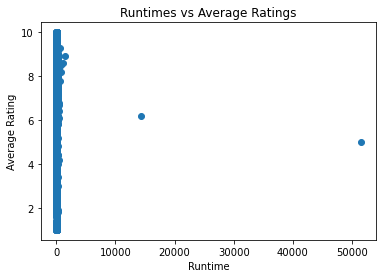

In [103]:
fig, ax = plt.subplots()
ax.scatter(imdb_time_rating['runtime_minutes'], imdb_time_rating['averagerating'])
ax.set_title('Runtimes vs Average Ratings')
ax.set_xlabel('Runtime')
ax.set_ylabel('Average Rating')

<AxesSubplot:>

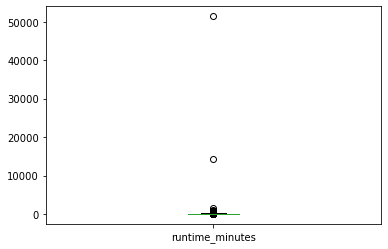

In [104]:
imdb_time_rating['runtime_minutes'].plot.box()

In [105]:
imdb_time_rating[imdb_time_rating['runtime_minutes'] > 10000]

,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
27683,Modern Times Forever,2011,14400.0,Documentary,6.2,69
70280,Logistics,2012,51420.0,Documentary,5.0,17


In [106]:
imdb_time_rating = imdb_time_rating[imdb_time_rating['runtime_minutes'] < 10000]

<AxesSubplot:>

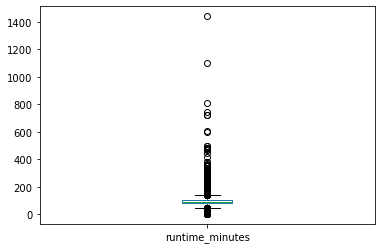

In [107]:
imdb_time_rating['runtime_minutes'].plot.box()

In [108]:
imdb_time_rating = imdb_time_rating[imdb_time_rating['runtime_minutes'] < 300]

In [ ]:
fig, axes = plt.subplots(1,2, figsize = (15, 5))
imdb_time_rating['runtime_minutes'].plot.box(ax=axes[0])
imdb_time_rating['runtime_minutes'].hist(ax=axes[1])

In [ ]:
fig, ax = plt.subplots(figsize = (15,5))
copy = imdb_time_rating.copy()
copy = copy[copy.runtime_minutes < 300]
sns.regplot(copy['runtime_minutes'],copy['averagerating'], ax=ax)
ax.set_title('Runtimes vs Average Ratings')
ax.set_xlabel('Runtime')
ax.set_ylabel('Average Rating')
ax.set(ylim=(0, 10))
ax.set(xlim=(0,400));

In [78]:
import numpy as np

In [111]:
x_run = copy['runtime_minutes']
y_rating = copy['averagerating']
coef = np.corrcoef(x_run, y_rating)
print(coef)

[[ 1.         -0.04418462]
 [-0.04418462  1.        ]]


In [ ]:
fig, ax = plt.subplots(figsize = (15,5))
copy = imdb_time_rating.copy()
copy = copy[copy.runtime_minutes < 300]
sns.regplot(copy['runtime_minutes'],copy['averagerating'], ax=ax)
ax.set_title('Runtimes vs Average Ratings')
ax.set_xlabel('Runtime')
ax.set_ylabel('Average Rating')
ax.set(ylim=(0, 10))
ax.set(xlim=(0,400));